### Descriptives Dataset
First, we will show some descriptives of the ground truth. Then we will dive deeper into the predictions of ChatGPT.

In [23]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import spacy
import nltk

First, a plot of the distribution of the classes.


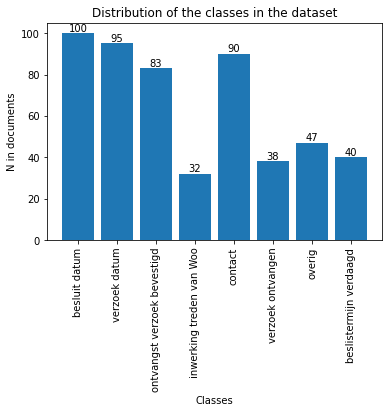

In [18]:
dataset = pd.read_csv("code/data/GT/GT/date_event_combinations.csv")
all_classes = Counter(list(dataset['class'].values))
plt.bar(all_classes.keys(), all_classes.values())

# Set labels and title
plt.xlabel('Classes')
plt.ylabel('N in documents')
plt.title('Distribution of the classes in the dataset')
plt.xticks(rotation='vertical')

for i, v in enumerate(all_classes.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Display the plot
print(f"First, a plot of the distribution of the classes.")
plt.show()


Second, a plot of the distribution of the length of the sentences.


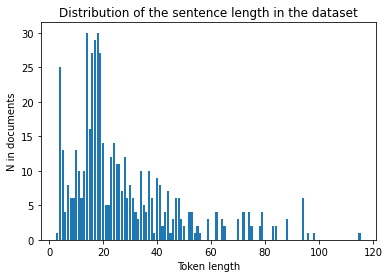

In [21]:
def get_token_length(text):
    tokens = text.split()
    return len(tokens)

dataset['Token Length'] = dataset['sentence'].apply(get_token_length)
all_sentences = Counter(list(dataset['Token Length'].values))
plt.bar(all_sentences.keys(), all_sentences.values())

# Set labels and title
plt.xlabel('Token length')
plt.ylabel('N in documents')
plt.title('Distribution of the sentence length in the dataset')

# Display the plot
print(f"Second, a plot of the distribution of the length of the sentences.")
plt.show()

### Descriptives prediction ChatGPT

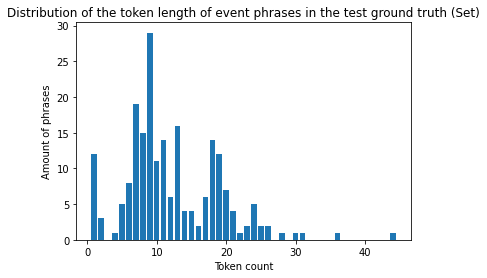

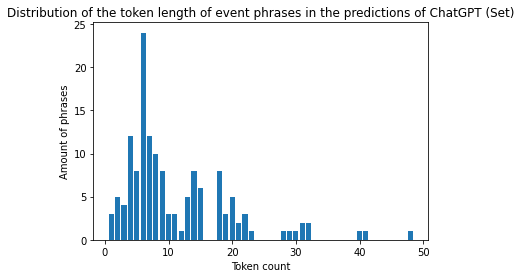

In [27]:
df_test = pd.read_csv("code/data/GT/GTtest/date_event_combinations.csv")
df_test = df_test.loc[df_test['class'] != 'besluit datum']
# nltk.download('punkt')
def tokenize_string(string):
    tokens = nltk.word_tokenize(string)
    return tokens

string_list = list(df_test['event'].values)

# Create a set of tokens
tokens_list = []
for string in string_list:
    tokens = tokenize_string(string)

    tokens_list.append(set(tokens))


len_events = [len(i) for i in tokens_list]
from collections import Counter

event_dis = Counter(len_events)

keys = list(event_dis.keys())
values = list(event_dis.values())

# Plot the histogram
plt.bar(keys, values)

# Set labels and title
plt.xlabel('Token count')
plt.ylabel('Amount of phrases')
plt.title('Distribution of the token length of event phrases in the test ground truth (Set)')

# Display the plot
plt.show()

df_jaccard = pd.read_csv("code/data/results/chatgpt_extraction/evaluated_predictions.csv")
df_jaccard = df_jaccard.loc[df_jaccard['truth']==True]

string_list = list(df_jaccard['prediction_event'].values)

# Create a set of tokens
tokens_list = []
for string in string_list:
    tokens = tokenize_string(string)
    tokens_list.append(set(tokens))


len_events = [len(i) for i in tokens_list]
from collections import Counter

event_dis = Counter(len_events)

keys = list(event_dis.keys())
values = list(event_dis.values())

# Plot the histogram
plt.bar(keys, values)

# Set labels and title
plt.xlabel('Token count')
plt.ylabel('Amount of phrases')
plt.title('Distribution of the token length of event phrases in the predictions of ChatGPT (Set)')

# Display the plot
plt.show()


